In [130]:
from pymatgen import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.site_symmetries import *
from pymatgen.io.cif import CifWriter
from pymatgen.io.vasp import Poscar
from pymatgen.io.cif import CifParser
from jupyter_jsmol.pymatgen import quick_view
from IPython.display import Image

#Iris CAMBIER 
#Tâche 6 

# Téléchargement du fichier CIF symmetrized du MoSe2

In [131]:
with MPRester("h54Ug2jjGzJ0JQCCfHsG") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-7581")
    
    w = CifWriter(structure,symprec=1e-3);
    w.write_file('MoSe2.cif')
structure = Structure.from_file('MoSe2.cif')

# Choix des éléments de symétrie

In [132]:
get_sym = SpacegroupAnalyzer(structure).get_symmetry_operations()

sym1 = get_sym[6]
sym2 = get_sym[1]
sym3 = get_sym[4]

# Choix des atomes 

In [133]:
Mo1 = [0.33333, 0.66667, 0.33333]
Se1 = [0.33333, 0.66667, 0.07585]
Se2 = [0.66667, 0.33333, 0.59104]

#trouvé à l'aide du logiciel VESTA

# Application des symétries aux atomes 

In [134]:
Mo1_app = sym1.operate(Mo1)
Se1_app = sym2.operate(Se1)
Se2_app = sym3.operate(Se2)

# Résultat de l'application de la 1ère symétrie : la TRANSLATION


$$
\left(\begin{array}{cc} 
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{array}\right)
\left(\begin{array}{cc} 
x\\ 
y\\
z\\
\end{array}\right)
+ 
\left(\begin{array}{cc} 
2/3\\ 
1/3\\
1/3\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
x + 2/3\\ 
y + 1/3\\
z + 1/3\\
\end{array}\right)
$$

In [135]:
print("L'atome Mo de départ a pour coordonnées", Mo1, "\n")
print("On lui applique la première symétrie 'x+2/3, y+1/3, z+1/3' : qui est caractérisée par cette matrice de rotation et ce vecteur de translation : \n", sym1, "\n")
print("Comme la matrice de rotation est la matrice identité, nous savons qu'il n'y a pas eu de rotation. Le vecteur tau caractérisant la translation est, quant à lui, non nul donc nous observons bien une translation de vecteur [2/3 1/3 1/3]. \n")
print("Grâce à cette symétrie le premier atome de Mo est envoyé sur l'autre atome de Mo dans la maille primitive adjacente. \n")
print("L'atome de Mo a maintenant comme coordonnées :", Mo1_app,"et quand on le renvoie dans la maille primitive il a comme coordonnées [0.00000, 0.00000, 0.66667]")
view = quick_view(structure)
display(view)

L'atome Mo de départ a pour coordonnées [0.33333, 0.66667, 0.33333] 

On lui applique la première symétrie 'x+2/3, y+1/3, z+1/3' : qui est caractérisée par cette matrice de rotation et ce vecteur de translation : 
 Rot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tau
[0.66666667 0.33333333 0.33333333] 

Comme la matrice de rotation est la matrice identité, nous savons qu'il n'y a pas eu de rotation. Le vecteur tau caractérisant la translation est, quant à lui, non nul donc nous observons bien une translation de vecteur [2/3 1/3 1/3]. 

Grâce à cette symétrie le premier atome de Mo est envoyé sur l'autre atome de Mo dans la maille primitive adjacente. 

L'atome de Mo a maintenant comme coordonnées : [0.99999667 1.00000333 0.66666333] et quand on le renvoie dans la maille primitive il a comme coordonnées [0.00000, 0.00000, 0.66667]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [136]:
view.script("draw symop 7 {atomno=7}")

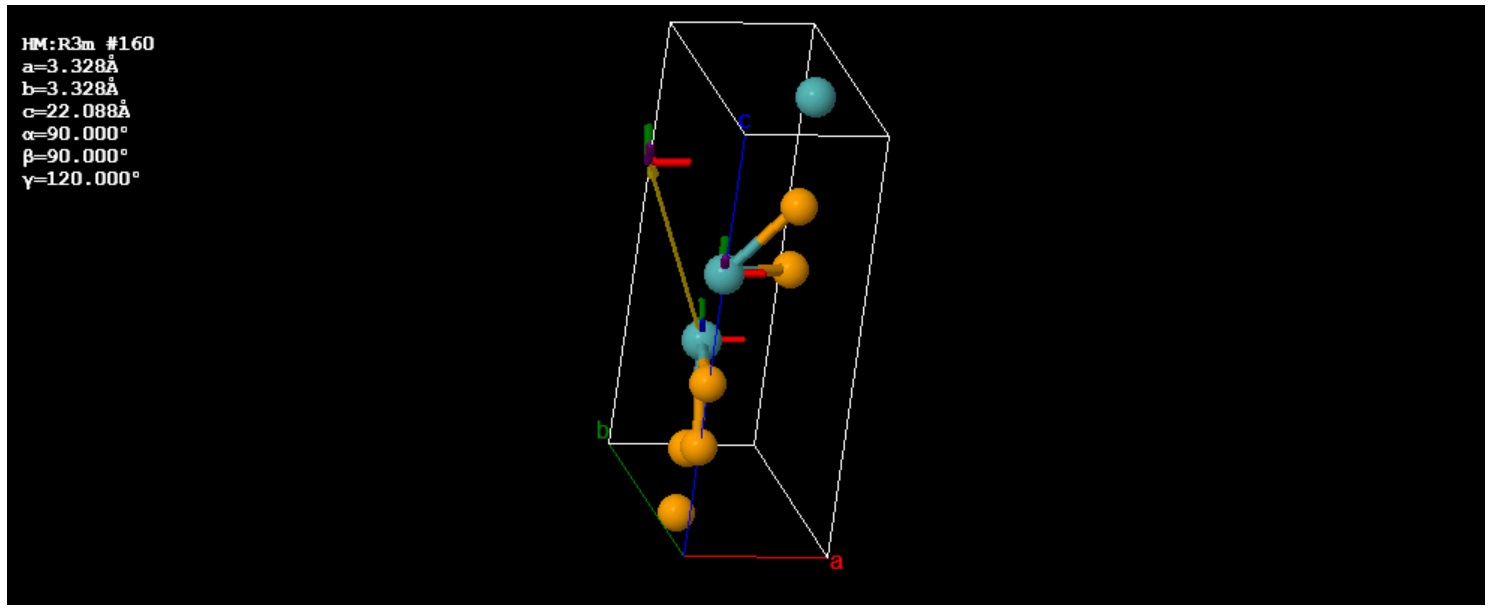

In [137]:
Image(filename = 'translation.PNG')

# Résultat de l'application de la 2ème symétrie : la ROTATION D'ORDRE 3

$$
\left(\begin{array}{cc} 
0 & -1 & 0\\
1 & -1 & 0\\
0 & 0 & 1\\
\end{array}\right)
\left(\begin{array}{cc} 
x\\ 
y\\
z\\
\end{array}\right)
+ 
\left(\begin{array}{cc} 
0\\ 
0\\
0\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
-y\\ 
x-y\\
z\\
\end{array}\right)
$$

In [138]:
print("L'atome Se de départ a pour coordonnées", Se1,"\n")
print("On lui applique la deuxième symétrie '-y, x-y, z': qui est caractérisée par cette matrice de rotation et ce vecteur translation : \n", sym2,"\n")
print("Nous observons qu'il n'y a pas de translation mais seulement une rotation. L'axe de rotation est le vecteur de base c. Cette symétrie est appelée une rotation d'ordre 3. Nous confirmons notre propos en vérifiant que le déterminant de notre matrice est bien 1 et que sa trace est nulle. \n")
print("Cette symétrie envoie l'atome de Se sur l'atome de Se équivalent de la maille primitive adjacente. \n")
print("L'atome de Se a maintenant comme coordonnées :", Se1_app,"\n")
view = quick_view(structure)
display(view)

L'atome Se de départ a pour coordonnées [0.33333, 0.66667, 0.07585] 

On lui applique la deuxième symétrie '-y, x-y, z': qui est caractérisée par cette matrice de rotation et ce vecteur translation : 
 Rot:
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.] 

Nous observons qu'il n'y a pas de translation mais seulement une rotation. L'axe de rotation est le vecteur de base c. Cette symétrie est appelée une rotation d'ordre 3. Nous confirmons notre propos en vérifiant que le déterminant de notre matrice est bien 1 et que sa trace est nulle. 

Cette symétrie envoie l'atome de Se sur l'atome de Se équivalent de la maille primitive adjacente. 

L'atome de Se a maintenant comme coordonnées : [-0.66667 -0.33334  0.07585] 



JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [139]:
view.script("draw symop 2 {atomno=9}")

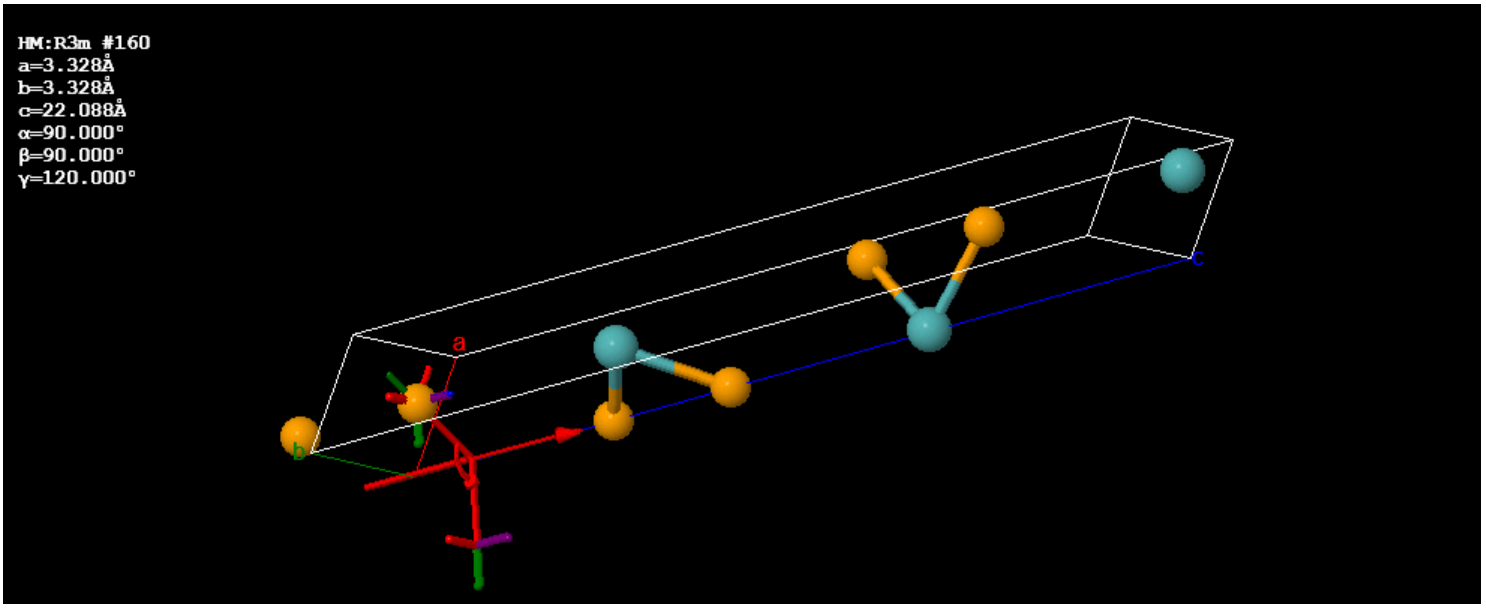

In [140]:
Image(filename = 'rot3.PNG')

# Résultat de l'application de la 3ème symétrie : PLAN MIROIR ou ROTO-INVERSION D'ORDRE 2

$$
\left(\begin{array}{cc} 
-1 & 1 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{array}\right)
\left(\begin{array}{cc} 
x\\ 
y\\
z\\
\end{array}\right)
+ 
\left(\begin{array}{cc} 
0\\ 
0\\
0\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
-x+y\\ 
y\\
z\\
\end{array}\right)
$$

In [141]:
print("L'atome Se de départ a pour coordonnées", Se2, "\n")
print("On lui applique la troisième symétrie '-x+y, y, z' : qui est caractérisée par cette matrice de rotation et ce vecteur de translation : \n", sym3,"\n")
print("Cette symétrie est appelée plan miroir. Plus précisément, il s'agit d'un plan miroir contenant l'axe c et étant perpendiculaire au plan ac. \n")
print("Le déterminant de cette matrice vaut -1, il s'agit bien d'un  plan miroir qu'on peut aussi appelé roto-inversion d'ordre 2.")
print("Nous observons que l'atome choisi est envoyé sur l'atome équivalent à celui-ci dans la cellule unité adjacente. \n")
print("L'atome de Se a maintenant comme coordonnées :", Se2_app, "\n")

view = quick_view(structure)
display(view)

L'atome Se de départ a pour coordonnées [0.66667, 0.33333, 0.59104] 

On lui applique la troisième symétrie '-x+y, y, z' : qui est caractérisée par cette matrice de rotation et ce vecteur de translation : 
 Rot:
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.] 

Cette symétrie est appelée plan miroir. Plus précisément, il s'agit d'un plan miroir contenant l'axe c et étant perpendiculaire au plan ac. 

Le déterminant de cette matrice vaut -1, il s'agit bien d'un  plan miroir qu'on peut aussi appelé roto-inversion d'ordre 2.
Nous observons que l'atome choisi est envoyé sur l'atome équivalent à celui-ci dans la cellule unité adjacente. 

L'atome de Se a maintenant comme coordonnées : [-0.33334  0.33333  0.59104] 



JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [142]:
view.script("draw symop 5 {atomno=5}")

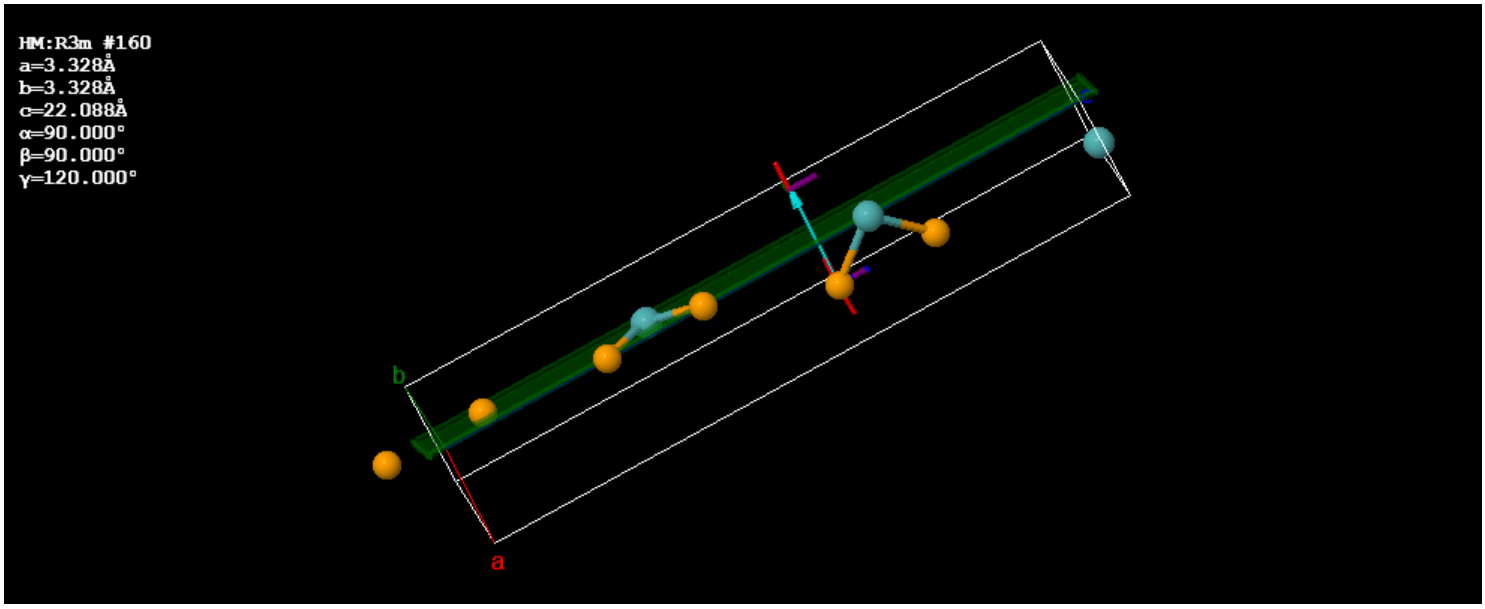

In [143]:
Image(filename = 'miroir.PNG')